In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_animes = pd.read_parquet("../../data/processed/animes_processed.parquet")
df_animes.head(10)

,uid,title,synopsis,aired,episodes,members,popularity,score,genres_list,genre_action,...,genre_emb_40,genre_emb_41,genre_emb_42,genre_emb_43,genre_emb_44,genre_emb_45,genre_emb_46,genre_emb_47,genre_emb_48,genre_emb_49
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",25,489888,141,8.82,"[Comedy, Sports, Drama, School, Shounen]",0,...,-0.325108,0.372583,-0.150133,0.063334,-0.037451,-0.023057,-0.015965,-0.079849,0.069605,0.041172
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",22,995473,28,8.83,"[Drama, Music, Romance, School, Shounen]",0,...,0.039412,0.307161,0.010229,0.095036,0.020471,-0.112495,-0.233364,-0.223070,-0.094668,0.010424
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",13,581663,98,8.83,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",0,...,0.241236,-0.047506,0.017787,0.183756,0.471296,0.002649,0.130329,-0.239705,-0.322175,-0.608473
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",64,1615084,4,9.23,"[Action, Military, Adventure, Comedy, Drama, M...",1,...,-0.031031,0.094117,0.084010,-0.000744,0.322104,-0.150647,-0.061140,-0.264919,-0.225668,-0.001621
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",1,214621,502,8.83,"[Action, Mystery, Supernatural, Vampire]",1,...,0.085453,-0.016847,-0.015368,0.250852,0.117892,-0.276332,0.251657,-0.217527,-0.120232,-0.557234
5,37510,Mob Psycho 100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","Jan 7, 2019 to Apr 1, 2019",13,442310,176,8.89,"[Action, Slice of Life, Comedy, Supernatural]",1,...,-0.037127,0.159679,0.233275,-0.244771,0.012024,-0.248264,-0.020235,-0.000815,0.010380,0.002741
6,199,Sen to Chihiro no Kamikakushi,"Stubborn, spoiled, and naïve, 10-year-old Chih...","Jul 20, 2001",1,913212,40,8.90,"[Adventure, Supernatural, Drama]",0,...,0.107310,0.132151,0.278707,0.159719,0.402134,-0.485785,0.263917,-0.151865,-0.420217,0.223778
7,38000,Kimetsu no Yaiba,"Ever since the death of his father, the burden...","Apr 6, 2019 to Sep 28, 2019",26,575037,106,8.92,"[Action, Demons, Historical, Shounen, Supernat...",1,...,0.113221,-0.099797,0.018980,0.003247,0.450094,-0.027240,-0.082962,-0.213881,-0.170457,-0.145498
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,"Aug 12, 2017 to Aug 13, 2017",7,189944,573,8.93,"[Mystery, Comedy, Supernatural, Vampire]",0,...,-0.078951,0.052401,0.011987,0.156864,-0.289549,-0.147272,0.334582,-0.114548,-0.035374,-0.252579
9,2904,Code Geass: Hangyaku no Lelouch R2,"One year has passed since the Black Rebellion,...","Apr 6, 2008 to Sep 28, 2008",25,992196,27,8.93,"[Action, Military, Sci-Fi, Super Power, Drama,...",1,...,-0.105253,0.141387,0.301835,0.080078,0.368225,-0.211279,0.091863,-0.211304,-0.288166,-0.188470


In [3]:
# Set seaborn theme for consistent styling across plots
sns.set_theme(context="notebook", style="whitegrid")

In [4]:
print(f"Shape: {df_animes.shape}")
print("\nData types:")
df_animes.info()
print("\nMissing values (top 20):")
print(df_animes.isna().sum().sort_values(ascending=False).head(20))
df_animes.head(5)

Shape: (16368, 120)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16368 entries, 0 to 16367
Columns: 120 entries, uid to genre_emb_49
dtypes: datetime64[ns](2), float32(50), float64(12), int64(50), object(6)
memory usage: 11.9+ MB

Missing values (top 20):
anime_age       1990
start_date      1990
start_year      1990
start_month     1990
start_day       1990
end_date        1978
genre_emb_14       0
genre_emb_10       0
genre_emb_11       0
genre_emb_12       0
genre_emb_13       0
uid                0
genre_emb_15       0
genre_emb_16       0
genre_emb_8        0
genre_emb_17       0
genre_emb_18       0
genre_emb_9        0
genre_emb_5        0
genre_emb_7        0
dtype: int64


,uid,title,synopsis,aired,episodes,members,popularity,score,genres_list,genre_action,...,genre_emb_40,genre_emb_41,genre_emb_42,genre_emb_43,genre_emb_44,genre_emb_45,genre_emb_46,genre_emb_47,genre_emb_48,genre_emb_49
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",25,489888,141,8.82,"[Comedy, Sports, Drama, School, Shounen]",0,...,-0.325108,0.372583,-0.150133,0.063334,-0.037451,-0.023057,-0.015965,-0.079849,0.069605,0.041172
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",22,995473,28,8.83,"[Drama, Music, Romance, School, Shounen]",0,...,0.039412,0.307161,0.010229,0.095036,0.020471,-0.112495,-0.233364,-0.223070,-0.094668,0.010424
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",13,581663,98,8.83,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]",0,...,0.241236,-0.047506,0.017787,0.183756,0.471296,0.002649,0.130329,-0.239705,-0.322175,-0.608473
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",64,1615084,4,9.23,"[Action, Military, Adventure, Comedy, Drama, M...",1,...,-0.031031,0.094117,0.084010,-0.000744,0.322104,-0.150647,-0.061140,-0.264919,-0.225668,-0.001621
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",1,214621,502,8.83,"[Action, Mystery, Supernatural, Vampire]",1,...,0.085453,-0.016847,-0.015368,0.250852,0.117892,-0.276332,0.251657,-0.217527,-0.120232,-0.557234


In [5]:
numeric_desc = df_animes.describe(include='number').T
numeric_desc

,count,mean,std,min,25%,50%,75%,max
uid,16368.0,19920.474707,14227.234351,1.000000,5307.750000,19952.000000,34178.250000,4.096000e+04
episodes,16368.0,11.373717,48.064959,1.000000,1.000000,2.000000,12.000000,3.057000e+03
members,16368.0,27665.055718,93646.766247,25.000000,297.000000,1879.000000,11901.000000,1.871043e+06
popularity,16368.0,8131.919599,4714.683351,1.000000,4042.500000,8115.000000,12208.250000,1.633800e+04
score,16368.0,6.353893,0.966305,1.250000,5.720000,6.370000,7.050000,9.230000e+00
...,...,...,...,...,...,...,...,...
genre_emb_45,16368.0,-0.171849,0.330742,-1.569037,-0.366584,-0.165870,0.039848,9.010076e-01
genre_emb_46,16368.0,-0.017519,0.340755,-0.814205,-0.150338,-0.054210,0.071549,1.553722e+00
genre_emb_47,16368.0,-0.059669,0.239068,-1.060290,-0.230501,-0.066506,0.084945,1.272670e+00
genre_emb_48,16368.0,-0.071476,0.286459,-0.993981,-0.217407,-0.105484,0.072193,1.664591e+00


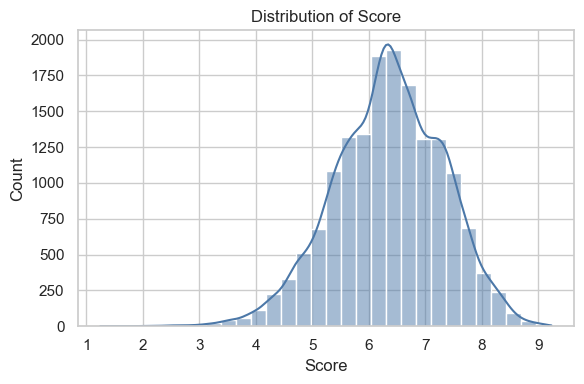

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_animes, x='score', bins=30, kde=True, color='#4C78A8')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/var/folders/2n/w6r5v5rn49q9rn5pr25r736w0000gn/T/ipykernel_2682/4233466987.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')


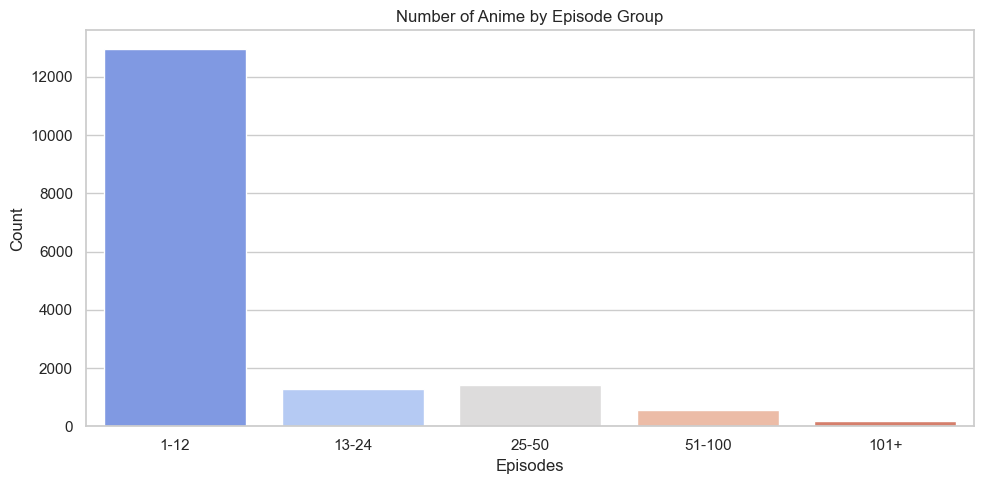

In [30]:
plt.figure(figsize=(10, 5))

bins = [0, 12, 24, 50, 100, df_animes['episodes'].max()]
labels = ['1-12', '13-24', '25-50', '51-100', '101+']
df_animes['episodes_group'] = pd.cut(df_animes['episodes'], bins=bins, labels=labels, right=True)

counts = df_animes['episodes_group'].value_counts().sort_index()

sns.barplot(x=counts.index, y=counts.values, palette='coolwarm')
plt.title('Number of Anime by Episode Group')
plt.xlabel('Episodes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

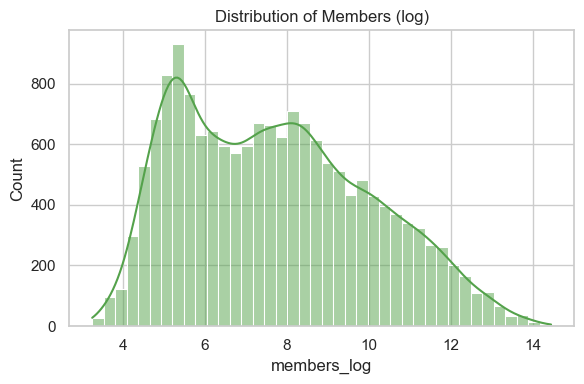

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_animes, x='members_log', bins=40, kde=True, color='#54A24B')
plt.title('Distribution of Members (log)')
plt.xlabel('members_log')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

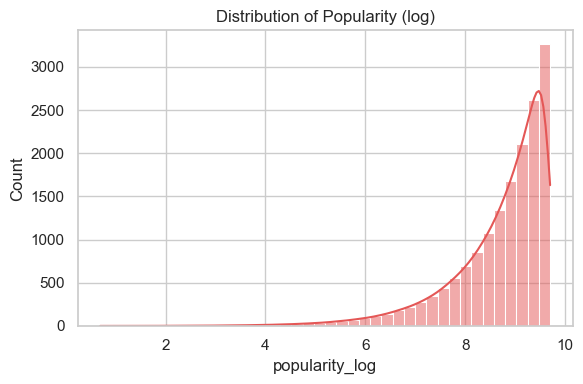

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_animes, x='popularity_log', bins=40, kde=True, color='#E45756')
plt.title('Distribution of Popularity (log)')
plt.xlabel('popularity_log')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

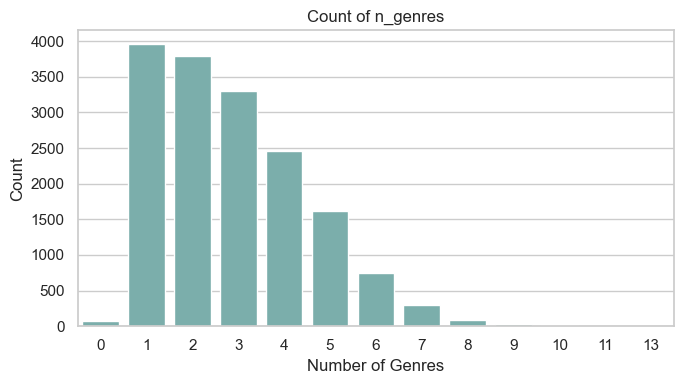

In [10]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_animes, x='n_genres', color='#72B7B2')
plt.title('Count of n_genres')
plt.xlabel('Number of Genres')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

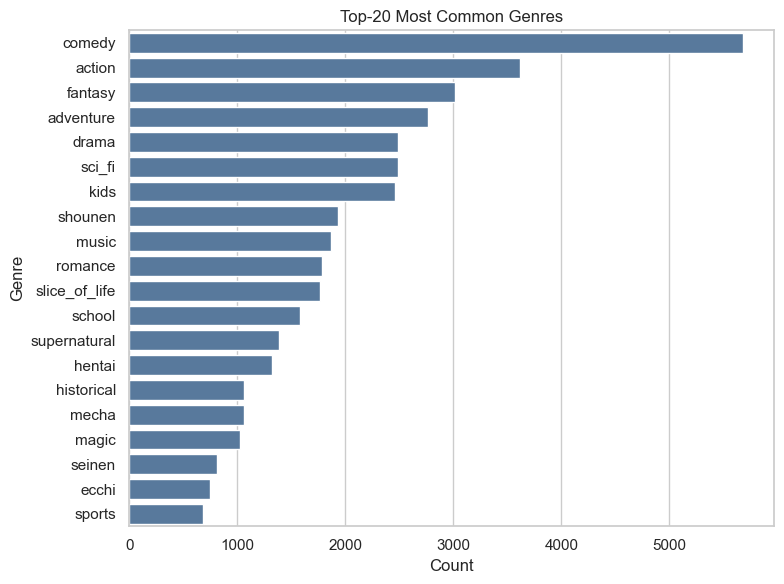

In [12]:
genre_cols = [c for c in df_animes.columns if
              c.startswith('genre_') and not (c.startswith('genre_emb_') | c.startswith('genre_entropy'))]
# ensure binary indicators; sum counts
genre_counts = df_animes[genre_cols].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(8, 6))
sns.barplot(x=genre_counts.values, y=[g.replace('genre_', '') for g in genre_counts.index], color='#4C78A8')
plt.title('Top-20 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

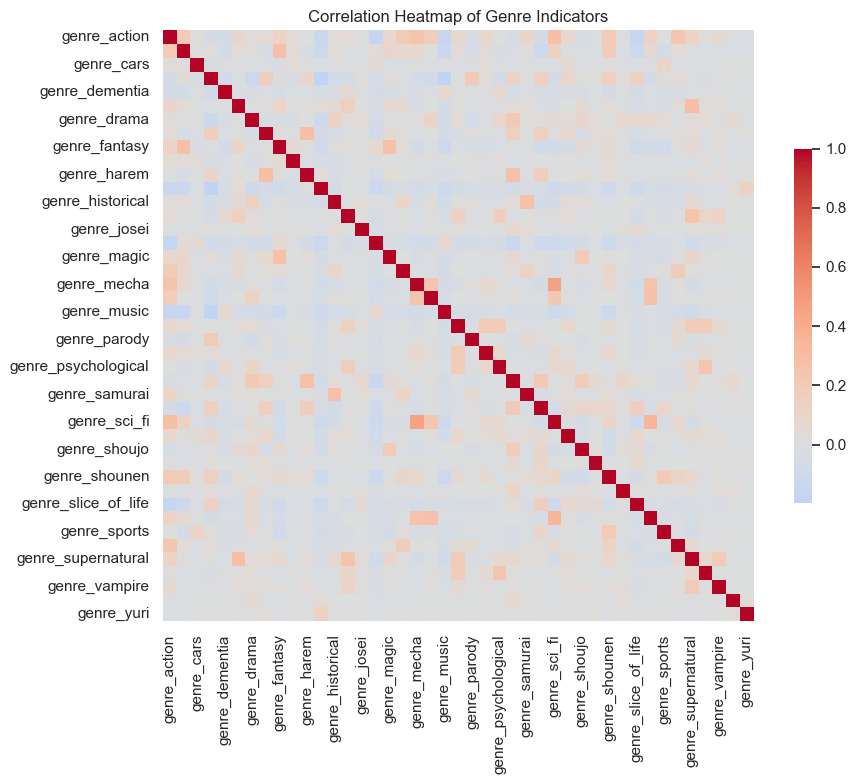

In [13]:
corr_genres = df_animes[genre_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_genres, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.6})
plt.title('Correlation Heatmap of Genre Indicators')
plt.tight_layout()
plt.show()

/var/folders/2n/w6r5v5rn49q9rn5pr25r736w0000gn/T/ipykernel_2682/146456859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='genre', y='score', palette='Set2')


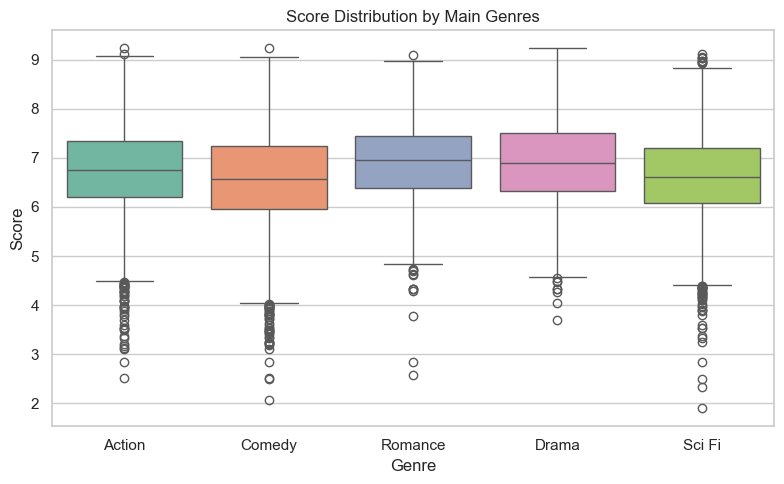

In [14]:
main_genres = ['genre_action', 'genre_comedy', 'genre_romance', 'genre_drama', 'genre_sci_fi']
main_genres = [g for g in main_genres if g in df_animes.columns]
df_long = df_animes[['score'] + main_genres].melt(id_vars='score', var_name='genre', value_name='flag')
df_long = df_long[df_long['flag'] == 1]
df_long['genre'] = df_long['genre'].str.replace('genre_', '').str.replace('_', ' ').str.title()
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_long, x='genre', y='score', palette='Set2')
plt.title('Score Distribution by Main Genres')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

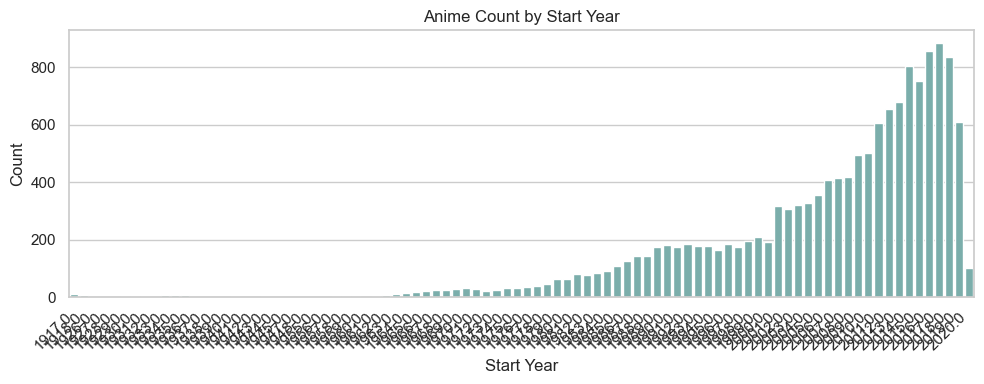

In [15]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_animes, x='start_year', color='#72B7B2')
plt.title('Anime Count by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

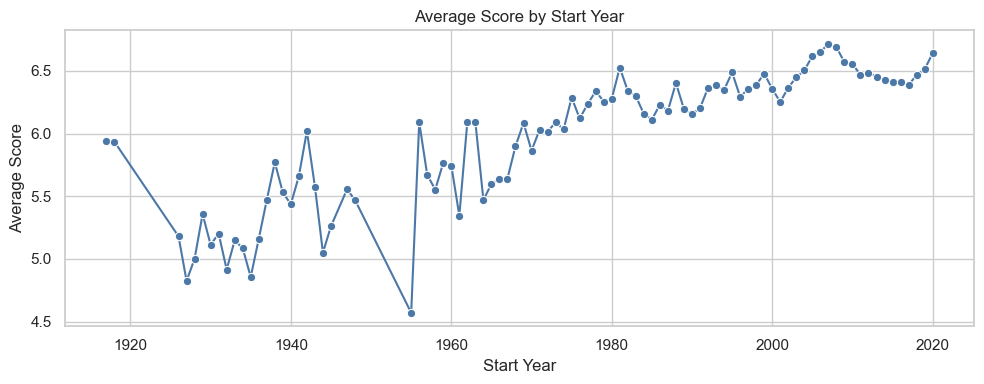

In [16]:
avg_score_by_year = (df_animes.groupby('start_year', dropna=True)['score']
                     .mean().reset_index().sort_values('start_year'))
plt.figure(figsize=(10, 4))
sns.lineplot(data=avg_score_by_year, x='start_year', y='score', marker='o', color='#4C78A8')
plt.title('Average Score by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

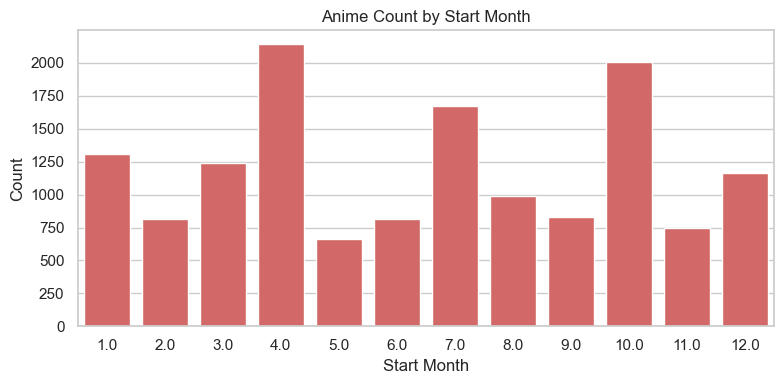

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_animes, x='start_month', color='#E45756')
plt.title('Anime Count by Start Month')
plt.xlabel('Start Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

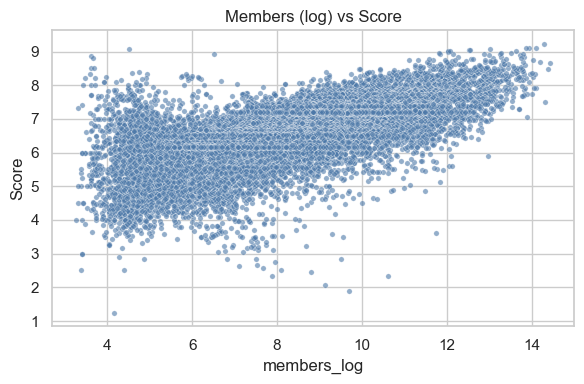

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_animes, x='members_log', y='score', s=15, alpha=0.6, color='#4C78A8')
plt.title('Members (log) vs Score')
plt.xlabel('members_log')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

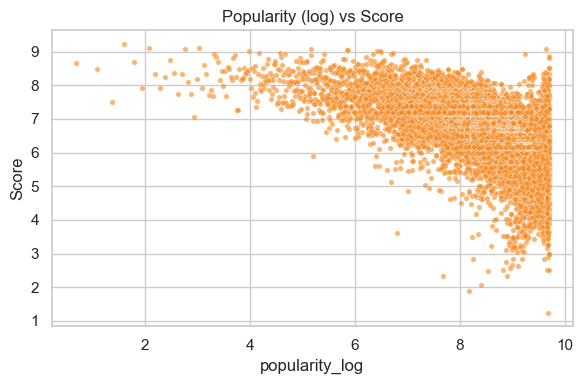

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_animes, x='popularity_log', y='score', s=15, alpha=0.6, color='#F58518')
plt.title('Popularity (log) vs Score')
plt.xlabel('popularity_log')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

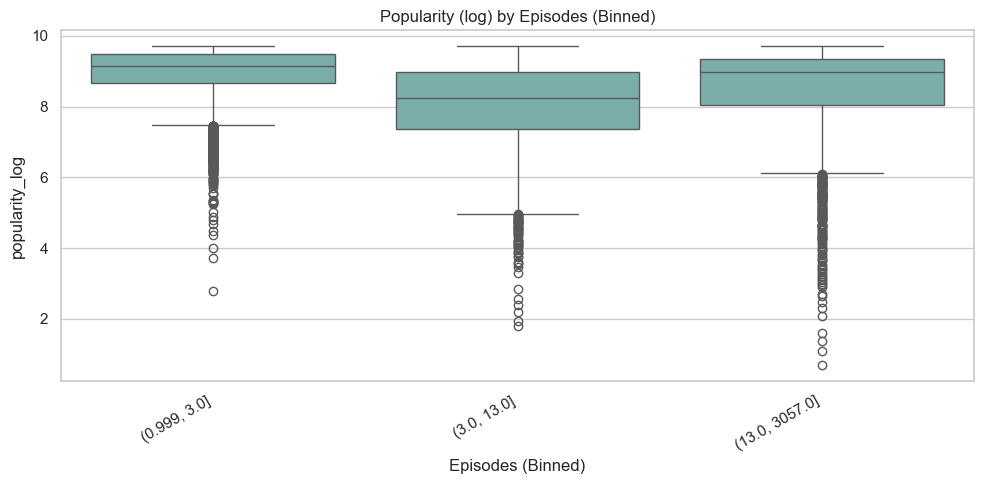

In [21]:
valid_eps = df_animes['episodes'].dropna()
q = min(5, max(2, valid_eps.nunique()))

df_eps = df_animes.copy()

df_eps['episodes_bin'] = pd.qcut(df_eps['episodes'], q=q, duplicates='drop')

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_eps, x='episodes_bin', y='popularity_log', color='#72B7B2')
plt.title('Popularity (log) by Episodes (Binned)')
plt.xlabel('Episodes (Binned)')
plt.ylabel('popularity_log')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

/var/folders/2n/w6r5v5rn49q9rn5pr25r736w0000gn/T/ipykernel_2682/1159453135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_animes, x='rare_genre_flag', palette=['#54A24B', '#E45756'])


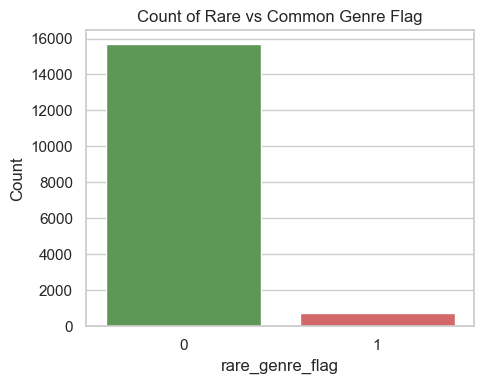

In [22]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df_animes, x='rare_genre_flag', palette=['#54A24B', '#E45756'])
plt.title('Count of Rare vs Common Genre Flag')
plt.xlabel('rare_genre_flag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

rarity
Common    15668
Rare        700
Name: count, dtype: int64
   rarity  score
0  Common   8.82
1  Common   8.83
2  Common   8.83
3  Common   9.23
4    Rare   8.83


/var/folders/2n/w6r5v5rn49q9rn5pr25r736w0000gn/T/ipykernel_2682/1722246541.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tmp, x='rarity', y='score', palette='Set2', cut=0, inner='quartile')


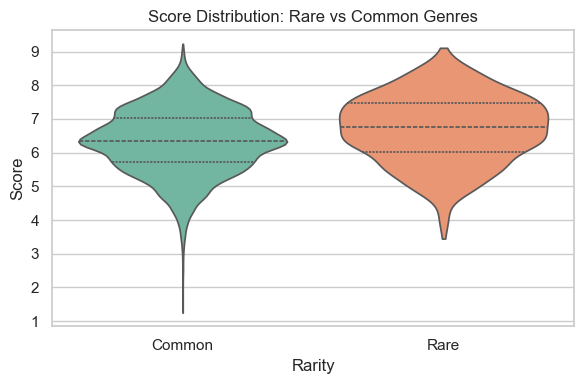

In [24]:
plt.figure(figsize=(6, 4))
df_tmp = df_animes.copy()

# убедимся, что rare_genre_flag булевский и нет NaN
df_tmp['rare_genre_flag'] = df_tmp['rare_genre_flag'].fillna(False).astype(bool)

# создаём колонку с метками
df_tmp['rarity'] = df_tmp['rare_genre_flag'].map({True: 'Rare', False: 'Common'})

# проверка, есть ли данные
print(df_tmp['rarity'].value_counts())
print(df_tmp[['rarity', 'score']].dropna().head())

sns.violinplot(data=df_tmp, x='rarity', y='score', palette='Set2', cut=0, inner='quartile')
plt.title('Score Distribution: Rare vs Common Genres')
plt.xlabel('Rarity')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


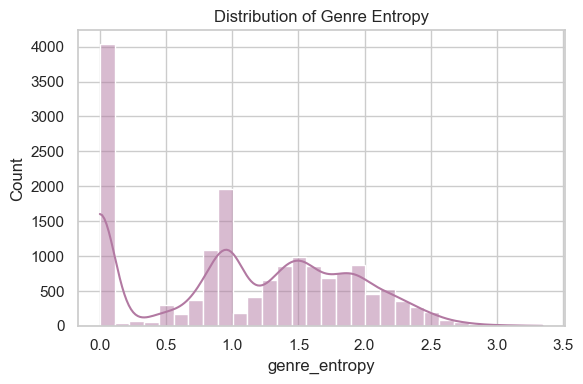

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_animes, x='genre_entropy', bins=30, kde=True, color='#B279A2')
plt.title('Distribution of Genre Entropy')
plt.xlabel('genre_entropy')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

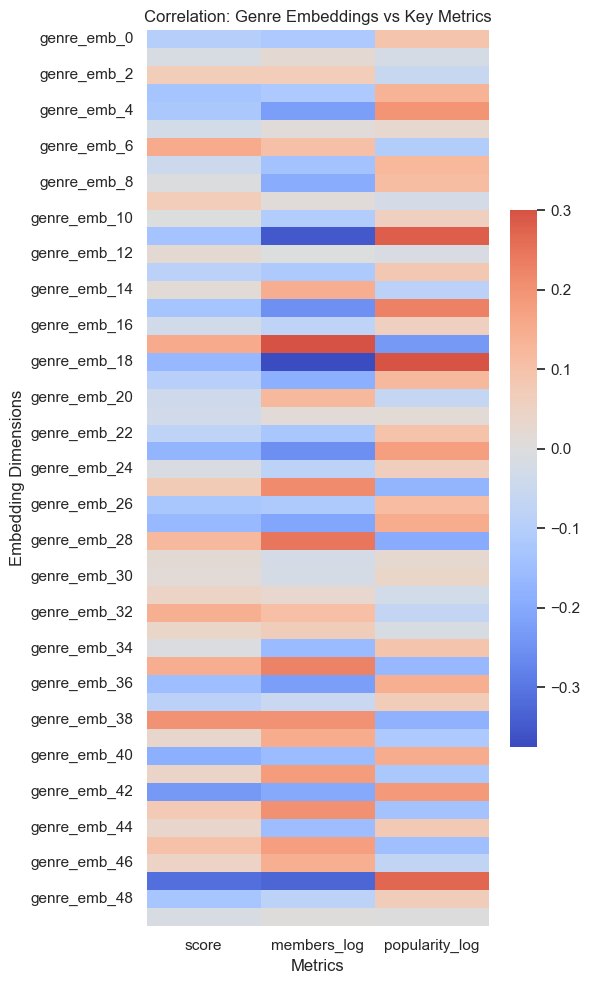

In [26]:
emb_cols = [c for c in df_animes.columns if c.startswith('genre_emb_')]
metrics = [c for c in ['score', 'members_log', 'popularity_log'] if c in df_animes.columns]
sub = df_animes[emb_cols + metrics].dropna()
if len(sub) > 0 and emb_cols and metrics:
    corr_mat = sub.corr().loc[emb_cols, metrics]
    plt.figure(figsize=(6, max(4, len(emb_cols) * 0.2)))
    sns.heatmap(corr_mat, annot=False, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.6})
    plt.title('Correlation: Genre Embeddings vs Key Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Embedding Dimensions')
    plt.tight_layout()
    plt.show()
else:
    print('Insufficient data for embedding correlation heatmap.')

In [ ]:
emb_cols = [c for c in df_animes.columns if c.startswith('genre_emb_')]
X = df_animes[emb_cols].dropna()
if not X.empty and len(emb_cols) >= 2:
    Xc = X - X.mean(axis=0)
    # SVD: Xc = U S Vt; first two principal component scores are U[:, :2] * S[:2]
    U, Svals, Vt = np.linalg.svd(Xc.to_numpy(), full_matrices=False)
    pcs = (U[:, :2] * Svals[:2])
    plt.figure(figsize=(6, 5))
    plt.scatter(pcs[:, 0], pcs[:, 1], s=10, alpha=0.6, c='#4C78A8')
    plt.title('PCA (2D) of Genre Embeddings')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()
else:
    print('Insufficient embedding dimensions or data for PCA plot.')

### EDA Summary & Insights

- Data health
  - Dataset has a rich mix of numeric, binary genre indicators, time fields, and 50D genre embeddings.
  - Missing values are limited to a few fields (dates/derived), manageable with filtering or imputation per task.

- Distributions
  - Score shows a compact range with light tails; outliers exist but are not dominant.
  - Episodes are heavy‑tailed; binning or logs help stabilize comparisons.
  - Log transforms (members_log, popularity_log) look approximately symmetric, confirming the choice of log scaling.

- Genres
  - Genre counts are concentrated at low to moderate n_genres per title (typical 1–4).
  - Top genres are dominated by broad categories (e.g., comedy, action, drama, romance, fantasy/adventure).
  - Genre correlation heatmap suggests coherent clusters (e.g., action–adventure–shounen, romance–shoujo, mecha–sci‑fi, ecchi–harem), indicating recurrent co‑occurrence patterns.

- Scores by genre
  - Boxplots indicate noticeable genre effects on score distributions; some genres show higher medians and tighter IQRs, others are more spread with lower medians.
  - Treat overlapping membership carefully (multi‑label); per‑genre views reflect conditional subsets, not causal effects.

- Time trends
  - Yearly counts vary with clear historical phases; monthly counts suggest seasonality typical of anime release cycles.
  - Average score by start_year is relatively stable with modest fluctuations; differences could reflect sampling or shifts in production trends.

- Popularity and engagement
  - Members_log and popularity_log have positive associations with score but with wide variance (hit titles at many score levels).
  - Popularity vs episodes shows heterogeneity: both short cours and long‑running series can be popular; medians may rise slightly with length.

- Rare genres and entropy
  - Rare_genre_flag is imbalanced as expected; violinplots show broadly similar medians, with rare genres often exhibiting wider variance.
  - Genre entropy skews toward mid‑range values; very low or very high entropy titles are less common, matching intuition about focused vs highly mixed genre labels.

- Embeddings
  - Correlations between individual embedding dimensions and metrics (score, members_log, popularity_log) are generally low‑to‑moderate, as expected.
  - PCA of genre embeddings reveals structure and dispersion; clusters may loosely align with major genre families.


